In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action = 'ignore')

In [48]:
pd.set_option('display.max_columns', None)


In [49]:
data1 = pd.read_csv('1.부산이용자통계데이터(2017~2022).csv', encoding = 'cp949') # 사용 - 무진
data2 = pd.read_csv('2. 부산 이용시설단체 데이터(2017~2022).csv', encoding = 'cp949') # 사용 - 은경
data3 = pd.read_csv('3.부산기부자정보조회(2016~2021년).csv', encoding = 'cp949')
data4 = pd.read_csv('4.부산접수현황통계데이터(2017~2022년).csv', encoding = 'cp949') # 사용 - 광태
data5 = pd.read_csv('5. 부산제공현황통계데이터(2017~2022년).csv', encoding = 'cp949') # 사용 - 용수
data6 = pd.read_csv('6.부산물품통계데이터조회(2017~2022년).csv', encoding = 'cp949')
data7 = pd.read_csv('7.부산센터데이터통계(2016~2021년).csv', encoding = 'cp949') # 사용
data8 = pd.read_csv('8.부산선호물품현황조회.csv', encoding = 'cp949')

In [50]:
data1 = data1[data1['지역코드'] == '부산']

In [51]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary


In [52]:
resumetable(data1)

데이터 세트 형상: (42910, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,기준년월,int64,0,72,201701,201701,201701
1,지역코드,object,0,1,부산,부산,부산
2,통합시군구코드,int64,0,16,3000002,3000002,3000002
3,지원센터코드,object,0,33,S02701,S02701,S02701
4,이용자구분코드,object,0,5,긴급지원대상자,저소득층,저소득층
5,이용자분류코드,object,0,16,독거어르신,기타,한부모가정
6,행복e음대상자여부,object,224,2,N,N,N
7,이용금액,float64,0,39872,16703.4,33406.8,16703.4
8,이용건수,int64,0,980,1,2,1
9,이용자수,int64,0,274,1,2,1


In [53]:
data1.head()

,기준년월,지역코드,통합시군구코드,지원센터코드,이용자구분코드,이용자분류코드,행복e음대상자여부,이용금액,이용건수,이용자수
0,201701,부산,3000002,S02701,긴급지원대상자,독거어르신,N,16703.4,1,1
1,201701,부산,3000002,S02701,저소득층,기타,N,33406.8,2,2
2,201701,부산,3000002,S02701,저소득층,한부모가정,N,16703.4,1,1
3,201701,부산,3000002,S02701,저소득층,독거어르신,N,66813.6,4,4
4,201701,부산,3000002,S02701,저소득층,결식아동,N,16703.4,1,1


In [54]:
data1['이용자구분코드'].unique()

array(['긴급지원대상자', '저소득층', '차상위계층', '기초생활보장수급자', '기초생활보장수급탈락자'],
      dtype=object)

* 지원 센터 코드에 따라서 이용을 많이 하는 사람 - 배치 위치에 대한 선정

In [55]:
data1[data1['이용자구분코드'] == '기초생활보장수급탈락자'].head()

,기준년월,지역코드,통합시군구코드,지원센터코드,이용자구분코드,이용자분류코드,행복e음대상자여부,이용금액,이용건수,이용자수
93,201701,부산,3000011,S03601,기초생활보장수급탈락자,저소득가정,N,73708.94,14,2
94,201701,부산,3000011,S03601,기초생활보장수급탈락자,한부모가정,N,40697.86,6,1
128,201701,부산,3000014,S03901,기초생활보장수급탈락자,독거어르신,N,736411.01,106,27
161,201701,부산,3000006,S40001,기초생활보장수급탈락자,독거어르신,N,149313.98,14,5
162,201701,부산,3000006,S40001,기초생활보장수급탈락자,한부모가정,N,18613.05,2,1


* 개인이용자 우선순위
1. 긴급지원대상자
2. 차상위계층(생계･의료급여를 받지 않는 주거･교육급여 수급자를 포함한다)
3. 생계･의료급여 수급신청 탈락자, 생계･의료급여가 중지된 사람, 기타 기부식품등 제공이 긴급히 필요한 저소득 재가 대상자 중 형편이 어려운 사람
4. 기초생활 수급자(생계․의료급여 수급자)

* 행복이음대상자 여부 - 삭제 판단


In [56]:
data1['이용자분류코드'].unique()

array(['독거어르신', '기타', '한부모가정', '결식아동', '저소득가정', '재가장애인', '다문화가정',
       '청장년1인가구', '조손가정', '소년소녀가장', '노인부부가구', '부부중심가구', '외국인노동자', '공통체가구',
       '새터민가구', '미혼모부가구'], dtype=object)

In [57]:
data1[data1['이용자분류코드'] == '외국인노동자'].head()

,기준년월,지역코드,통합시군구코드,지원센터코드,이용자구분코드,이용자분류코드,행복e음대상자여부,이용금액,이용건수,이용자수
256,201701,부산,3000002,S40301,차상위계층,외국인노동자,N,50739.86,5,2
305,201701,부산,3000001,S49001,저소득층,외국인노동자,N,18620.00,6,1
318,201701,부산,3000001,S49001,기초생활보장수급자,외국인노동자,N,21663.00,9,3
335,201701,부산,3000010,S50101,기초생활보장수급자,외국인노동자,N,17395.24,3,1
348,201701,부산,3000005,S50701,저소득층,외국인노동자,N,93285.45,7,2


* 지원센터코드를 통해 한 코드 이용 - 이용건수랑 이용자수파악해서 위치에 가중치 주기
    * 이용자구분코드 - 이용자 분류코드 확인 - 통계적


In [115]:
data1['기준년월'] = data1['기준년월'].astype(str)

In [116]:
def silce_year(a):
    return a[:4]

In [117]:
data1['년'] = data1['기준년월'].apply(silce_year)

In [58]:
data2 = data2[data2['지역코드'] == '부산']

In [59]:
resumetable(data2)

데이터 세트 형상: (8993, 9)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,기준년월,int64,0,72,201701,201701,201701
1,지역코드,object,0,1,부산,부산,부산
2,통합시군구코드,int64,0,16,3000001,3000001,3000001
3,지원센터코드,object,0,32,S02601,S02601,S02601
4,시설유형명,object,0,3,이용시설,이용시설,이용시설
5,시설단체분류코드,object,0,19,재가복지센터,지역아동센터,기타이용시설
6,이용금액,float64,0,8532,1942860.07,13415987.45,15934968.52
7,이용건수,int64,0,352,124,1072,1257
8,시설단체수,int64,0,22,1,5,5


In [60]:
data2.head()

,기준년월,지역코드,통합시군구코드,지원센터코드,시설유형명,시설단체분류코드,이용금액,이용건수,시설단체수
0,201701,부산,3000001,S02601,이용시설,재가복지센터,1942860.07,124,1
1,201701,부산,3000001,S02601,이용시설,지역아동센터,13415987.45,1072,5
2,201701,부산,3000001,S02601,이용시설,기타이용시설,15934968.52,1257,5
3,201701,부산,3000001,S02601,기타시설,기타법인단체,9539396.63,824,2
4,201701,부산,3000001,S02601,이용시설,무료급식소,4519074.78,432,1


In [61]:
data3 = data3[data3['지역코드'] == '부산']

In [62]:
data3

,기준년월,지역코드,통합시군구코드,지원센터코드,기부자구분코드,기부사업장종류코드,기부자명,기부금액,기부건수,기부자수
0,201601,부산,3000013,S02501,기업(개인사업자),"식품 도,소매업",신정푸드(주),3360000.0,1,1
1,201601,부산,3000013,S02501,기업(개인사업자),"식품제조,가공업",팔구어묵,65000.0,6,1
2,201601,부산,3000013,S02501,기업(개인사업자),"식품 도,소매업",코카콜라음료 주식회사,13533263.0,1,1
3,201601,부산,3000013,S02501,기업(개인사업자),"식품 도,소매업",농업회사법인주식회사 한파밍,480000.0,1,1
4,201601,부산,3000013,S02501,기업(개인사업자),"식품제조,가공업",아태물류,2500000.0,1,1
...,...,...,...,...,...,...,...,...,...,...
19594,202112,부산,3000013,S64701,개인,일반가정,개인기부자,600000.0,5,5
19595,202112,부산,3000013,S64701,기업(개인사업자),"식품 도,소매업",하나유통,1428330.0,2,1
19596,202112,부산,3000013,S64701,기업(개인사업자),기타,중앙철재,200000.0,1,1
19597,202112,부산,3000012,S64801,단체,"식품제조,가공업",부산광역시농업기술센터,500000.0,3,1


In [63]:
data4[data4['지역코드'] == 3]

,기준년월,지역코드,통합시군구코드,접수지원센터코드,식품여부,기부물품대분류코드,기부물품중분류코드,장부금액,장부수량,기부자수,기부건수
0,201701,3,3000001,S02601,Y,스포츠용품,유제품,5327060.00,2051,8,81
1,201701,3,3000001,S49001,Y,스포츠용품,조미료,11091000.00,4906,9,442
2,201701,3,3000001,S49001,Y,스포츠용품,축산가공식품,220400.00,79,1,2
3,201701,3,3000001,S49001,Y,스포츠용품,수산가공식품,1346772.00,781,6,25
4,201701,3,3000001,S49001,Y,스포츠용품,대용식기타,6150246.68,3564,8,266
...,...,...,...,...,...,...,...,...,...,...,...
11045,202212,3,3000015,S51601,Y,신선식품,농산물,5375000.00,323,3,6
11046,202212,3,3000015,S51601,Y,신선식품,기타신선식품,11264111.00,3161,3,26
11047,202212,3,3000015,S63301,Y,스포츠용품,대용식(빵),5581600.00,1638,11,100
11048,202212,3,3000100,S04101,Y,스포츠용품,대용식(빵),19830900.00,4366,10,115


In [64]:
data5 = data5[data5['지역코드'] == '부산']

In [65]:
resumetable(data5)

데이터 세트 형상: (19256, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,기준년월,int64,0,72,201701,201701,201701
1,지역코드,object,0,1,부산,부산,부산
2,통합시군구코드,int64,0,16,3000001,3000001,3000001
3,지원센터코드,object,0,36,S02601,S02601,S02601
4,식품여부,object,0,2,Y,Y,Y
5,기부물품대분류코드,object,9,9,스포츠용품,스포츠용품,스포츠용품
6,기부물품중분류코드,object,0,61,조미료,유제품,축산가공식품
7,이용자수,int64,0,679,15,8,7
8,제공건수,int64,0,1329,1196,81,11
9,제공금액,float64,0,15977,10107412.9,5327060.24,212600.0


In [66]:
data5

,기준년월,지역코드,통합시군구코드,지원센터코드,식품여부,기부물품대분류코드,기부물품중분류코드,이용자수,제공건수,제공금액
0,201701,부산,3000001,S02601,Y,스포츠용품,조미료,15,1196,10107412.90
1,201701,부산,3000001,S02601,Y,스포츠용품,유제품,8,81,5327060.24
2,201701,부산,3000001,S02601,Y,스포츠용품,축산가공식품,7,11,212600.00
3,201701,부산,3000001,S02601,Y,스포츠용품,수산가공식품,9,41,321981.00
4,201701,부산,3000001,S02601,Y,스포츠용품,대용식기타,15,709,4807454.03
...,...,...,...,...,...,...,...,...,...,...
19251,202212,부산,3000012,S64801,Y,스포츠용품,농산물가공식품,33,33,450000.00
19252,202212,부산,3000012,S64801,Y,스포츠용품,음료류,93,122,222194.30
19253,202212,부산,3000012,S64801,Y,스포츠용품,과자류,83,119,1087774.66
19254,202212,부산,3000012,S64801,Y,스포츠용품,건강식품,243,323,2842818.72


In [67]:
data5['지원센터코드'] = data5['지원센터코드'].map({'S40001':'동래등대지기푸드마켓',
'S40301':'푸르미&나누미푸드마켓',
'S49001':'중구다솜나래푸드마켓',
'S51401':'부산금정구푸드마켓', 
'S51501':'부산영도구푸드마켓', 
'S58201':'부산수영구함께하는푸드마켓',
'S63901':'기장푸드마켓', 
'S64001':'동구푸드마켓', 
'S64801':'강서구둥지푸드마켓'})

In [68]:
data5.dropna(axis = 0, inplace = True)

In [69]:
data5

,기준년월,지역코드,통합시군구코드,지원센터코드,식품여부,기부물품대분류코드,기부물품중분류코드,이용자수,제공건수,제공금액
75,201701,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,기타가공식품,413,539,3408590.74
76,201701,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,대용식(빵),2,8,2910500.12
77,201701,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,음료류,16,16,85280.00
78,201701,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,건강식품,23,23,4565000.00
79,201701,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,분말류,33,33,59800.00
...,...,...,...,...,...,...,...,...,...,...
19251,202212,부산,3000012,강서구둥지푸드마켓,Y,스포츠용품,농산물가공식품,33,33,450000.00
19252,202212,부산,3000012,강서구둥지푸드마켓,Y,스포츠용품,음료류,93,122,222194.30
19253,202212,부산,3000012,강서구둥지푸드마켓,Y,스포츠용품,과자류,83,119,1087774.66
19254,202212,부산,3000012,강서구둥지푸드마켓,Y,스포츠용품,건강식품,243,323,2842818.72


In [70]:
data5['기부물품중분류코드'].unique()

array(['기타가공식품', '대용식(빵)', '음료류', '건강식품', '분말류', '통조림/병', '대용식기타',
       '축산가공식품', '조미료', '신발', '패션잡화', '생활용품', '세탁용품', '위생용품', '화장품',
       '농산물', '주방용품', '의류', '의약품', '청소/욕실용품', '과자류', '즉석/편의식품', '냉동식품',
       '유제품', '절임/발효식품', '기타신선식품', '수산가공식품', '유아식품', '농산물가공식품', '기타일상용품',
       '문구/사무용품', '일용잡화', '축산물', '어육/연식품류', '가공식품세트류', 'DIY용품', '침실용품',
       '기타가정용품', '기타의류/잡화', '실내인테리어용품', '가전', '완구', '유가공품', '애완용품', '급식류',
       '축산물(냉동)', '수산물', '기타', '언더웨어/양말', '의류잡화세트', '수산물(냉동)', '의료용품',
       '신선식품세트류', '도시락류', '가정용품세트류'], dtype=object)

In [71]:
data5['남은건수'] = data5['제공건수'] // data5['이용자수']

In [72]:
data5[data5['남은건수'] > 0].sort_values('남은건수', ascending = False).head(10)

,기준년월,지역코드,통합시군구코드,지원센터코드,식품여부,기부물품대분류코드,기부물품중분류코드,이용자수,제공건수,제공금액,남은건수
10717,202004,부산,3000003,동구푸드마켓,Y,스포츠용품,조미료,1,51,1316140.00,51
11494,202008,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,대용식(빵),1,38,7615698.47,38
12618,202101,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,대용식(빵),1,37,5848850.79,37
10523,202003,부산,3000004,부산영도구푸드마켓,Y,스포츠용품,과자류,9,288,369987.00,32
2919,201711,부산,3000100,기장푸드마켓,Y,스포츠용품,대용식(빵),2,63,0.00,31
10722,202004,부산,3000003,동구푸드마켓,Y,스포츠용품,분말류,1,31,1092370.00,31
13837,202106,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,대용식(빵),1,30,6108181.03,30
14638,202109,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,대용식(빵),1,28,3158401.56,28
11013,202006,부산,3000006,동래등대지기푸드마켓,Y,스포츠용품,대용식(빵),1,28,5352699.23,28
10544,202003,부산,3000100,기장푸드마켓,Y,스포츠용품,대용식(빵),1,26,3622000.00,26


In [73]:
data6.head(10)

,기준년월,유통기한사용여부,유해상품차단여부,식품여부,기부물품대분류코드,기부물품중분류코드,기부물품수량,장부금액
0,201701,N,N,Y,신선식품,수산물(냉동),0,0.00
1,201701,N,N,Y,스포츠용품,조미료,0,0.00
2,201701,N,N,Y,신선식품,신선식품세트류,0,0.00
3,201701,N,N,Y,스포츠용품,과자류,21677,25298793.16
4,201701,N,N,Y,신선식품,기타신선식품,392,2438914.24
5,201701,N,N,Y,스포츠용품,절임/발효식품,0,0.00
6,201701,N,N,N,일상용품,위생용품,160,1030600.00
7,201701,N,N,Y,스포츠용품,음료류,2366,786198.14
8,201701,N,N,N,일상용품,일용잡화,0,0.00
9,201701,N,Y,Y,스포츠용품,절임/발효식품,0,0.00


In [74]:
resumetable(data6)

데이터 세트 형상: (7210, 8)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,기준년월,int64,0,72,201701,201701,201701
1,유통기한사용여부,object,0,2,N,N,N
2,유해상품차단여부,object,0,2,N,N,N
3,식품여부,object,0,2,Y,Y,Y
4,기부물품대분류코드,object,54,9,신선식품,스포츠용품,신선식품
5,기부물품중분류코드,object,5,67,수산물(냉동),조미료,신선식품세트류
6,기부물품수량,int64,0,2278,0,0,0
7,장부금액,float64,0,3620,0.0,0.0,0.0


> 데이터 5번이랑 유사한데 5번에 지역코드가 있어서 5번 사용할 것 같습니다.

In [75]:
data7 = data7[data7['지역코드'] == '부산']
data7.head()

,기준년월,지역코드,통합시군구코드,지원센터단위코드,지원센터구분코드,지원센터코드,지원센터전화번호,지원센터주소,지원센터상세주소,지원센터상태코드,운영주체대분류코드,운영주체소분류코드,신고구분코드,등록일자,접수금액,제공금액,인수금액,이관금액,이용자수
0,201601,부산,3000013,광역,푸드뱅크,S02501,051-791-1377,부산광역시 연제구 월드컵대로187번길 6,(거제동),사용,법인 운영,사단법인,당연신고,20140701,113589254.0,0.00,210718876,322779883,0
1,201601,부산,3000001,기초,푸드뱅크,S02601,051-464-3137,부산 중구 대청동4가,75-7,사용,법인 운영,사회복지법인,임의신고,20020101,16015240.0,17883239.22,0,0,11
2,201601,부산,3000002,기초,푸드뱅크,S02701,051-241-1133,부산 서구 암남동,산 169-1 19/4,사용,법인 운영,사회복지법인,임의신고,20020101,9622180.0,50062183.78,10231401,0,43
3,201601,부산,3000003,기초,푸드뱅크,S02801,051-633-3367,부산 동구 범일6동,1542-1,사용,법인 운영,재단법인,임의신고,20020101,18858506.0,32669858.20,4194611,0,31
4,201601,부산,3000004,기초,푸드뱅크,S02901,051-404-5061,부산 영도구 동삼3동,1123,사용,법인 운영,사회복지법인,임의신고,20020101,14520339.0,16193324.88,8770722,0,1379


In [76]:
data7['기준년월'] = data7['기준년월'].astype(str)

In [77]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준년월       1946 non-null   object 
 1   지역코드       1946 non-null   object 
 2   통합시군구코드    1946 non-null   int64  
 3   지원센터단위코드   1946 non-null   object 
 4   지원센터구분코드   1946 non-null   object 
 5   지원센터코드     1946 non-null   object 
 6   지원센터전화번호   1946 non-null   object 
 7   지원센터주소     1946 non-null   object 
 8   지원센터상세주소   1902 non-null   object 
 9   지원센터상태코드   1946 non-null   object 
 10  운영주체대분류코드  1946 non-null   object 
 11  운영주체소분류코드  1946 non-null   object 
 12  신고구분코드     1946 non-null   object 
 13  등록일자       1946 non-null   int64  
 14  접수금액       1946 non-null   float64
 15  제공금액       1946 non-null   float64
 16  인수금액       1946 non-null   int64  
 17  이관금액       1946 non-null   int64  
 18  이용자수       1946 non-null   int64  
dtypes: float64(2), int64(5), object(12)
memory usage

In [78]:
def silce_year(a):
    return a[:4]
data7['년'] = data7['기준년월'].apply(silce_year)

In [79]:
data7['년'] = data7['기준년월'].apply(silce_year)

In [80]:
data7

,기준년월,지역코드,통합시군구코드,지원센터단위코드,지원센터구분코드,지원센터코드,지원센터전화번호,지원센터주소,지원센터상세주소,지원센터상태코드,운영주체대분류코드,운영주체소분류코드,신고구분코드,등록일자,접수금액,제공금액,인수금액,이관금액,이용자수,년
0,201601,부산,3000013,광역,푸드뱅크,S02501,051-791-1377,부산광역시 연제구 월드컵대로187번길 6,(거제동),사용,법인 운영,사단법인,당연신고,20140701,113589254.0,0.00,210718876,322779883,0,2016
1,201601,부산,3000001,기초,푸드뱅크,S02601,051-464-3137,부산 중구 대청동4가,75-7,사용,법인 운영,사회복지법인,임의신고,20020101,16015240.0,17883239.22,0,0,11,2016
2,201601,부산,3000002,기초,푸드뱅크,S02701,051-241-1133,부산 서구 암남동,산 169-1 19/4,사용,법인 운영,사회복지법인,임의신고,20020101,9622180.0,50062183.78,10231401,0,43,2016
3,201601,부산,3000003,기초,푸드뱅크,S02801,051-633-3367,부산 동구 범일6동,1542-1,사용,법인 운영,재단법인,임의신고,20020101,18858506.0,32669858.20,4194611,0,31,2016
4,201601,부산,3000004,기초,푸드뱅크,S02901,051-404-5061,부산 영도구 동삼3동,1123,사용,법인 운영,사회복지법인,임의신고,20020101,14520339.0,16193324.88,8770722,0,1379,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,202112,부산,3000015,기초,푸드뱅크,S63301,051-305-4286,부산광역시 사상구 모라로192번길 20-33,"(모라동, 주공아파트3단지)",사용,법인 운영,사회복지법인,임의신고,20170227,7427600.0,9047899.59,1620300,0,267,2021
1942,202112,부산,3000100,기초,푸드마켓,S63901,051-722-4006,부산광역시 기장군 기장읍 대청로21번길 9,NaN,사용,법인 운영,사단법인,임의신고,20170609,1708000.0,10657003.41,7089301,0,226,2021
1943,202112,부산,3000003,기초,푸드마켓,S64001,051-905-1378,부산광역시 동구 진성로 68,(수정동),사용,비영리 민간 단체·시설 운영,비영리 민간 단체·시설,임의신고,20170609,745600.0,23622815.74,10134794,0,221,2021
1944,202112,부산,3000013,기초,푸드마켓,S64701,051-714-1378,부산광역시 연제구 월드컵대로187번길 6,(거제동),사용,법인 운영,사단법인,임의신고,20171023,2228330.0,17254755.67,1483776,15213810,236,2021


In [36]:
# data7['지원센터구분코드'].unique()

array(['푸드뱅크', '푸드마켓'], dtype=object)

In [37]:
# data7[data7['지원센터구분코드'] == '푸드마켓']

In [81]:
main_val = {'S02501':'부산광역푸드뱅크',
            'S03701':'강서구기초푸드뱅크',
            'S64801':'강서구기초푸드마켓',
            'S03601':'금정구기초푸드뱅크',
            'S51401':'금정구푸드마켓',
            'S04101':'기장군기초푸드뱅크',
            'S63901':'기장군기초푸드마켓',
            'S03201':'남구기초푸드뱅크',
            'S48201':'남구기초푸드마켓',
            'S02801':'동구기초푸드뱅크',
            'S64001':'동구기초푸드마켓',
            'S03101':'동래구기초푸드뱅크',
            'S40001':'동래구기초푸드마켓',
            'S03001':'부산진구기초푸드뱅크',
            'S50701':'부산진구기초푸드마켓',
            'S03301':'북구기초푸드뱅크',
            'S40101':'북구기초푸드마켓',
            'S63301':'사상구기초푸드뱅크',
            'S51601':'사상구기초푸드마켓',
            'S03501':'부산사하기초푸드뱅크',
            'S50101':'사하구기초푸드마켓',
            'S02701':'서구기초푸드뱅크',
            'S40301':'서구기초푸드마켓',
            'S03901':'수영구기초푸드뱅크',
            'S58201':'수영구기초푸드마켓',
            'S03801':'연제구기초푸드뱅크',
            'S64701':'연제구기초푸드마켓',
            'S02901':'영도구기초푸드뱅크',
            'S51501':'영도구기초푸드마켓',
            'S02601':'중구기초푸드뱅크',
            'S49001':'중구기초푸드마켓',
            'S03401':'해운대기초푸드뱅크',    
            'S40201':'해운대기초푸드마켓',    
}

In [82]:
data7['지원센터코드'] = data7['지원센터코드'].map(main_val)

In [83]:
data7[data7['지원센터코드'].isnull()]['지원센터주소'].unique()

array(['부산 영도구 봉래동3가', '부산광역시 사하구 다대낙조2길 3', '부산광역시 영도구 해님2길 3'],
      dtype=object)

In [87]:
data7.isnull().sum()

기준년월          0
지역코드          0
통합시군구코드       0
지원센터단위코드      0
지원센터구분코드      0
지원센터코드       62
지원센터전화번호      0
지원센터주소        0
지원센터상세주소     44
지원센터상태코드      0
운영주체대분류코드     0
운영주체소분류코드     0
신고구분코드        0
등록일자          0
접수금액          0
제공금액          0
인수금액          0
이관금액          0
이용자수          0
년             0
dtype: int64

In [88]:
data7[data7['지원센터상세주소'].isnull()]['지원센터주소'].unique()

array(['부산광역시 기장군 기장읍 대청로21번길 9'], dtype=object)

In [91]:
data7['지원센터코드'].unique()

array(['부산광역푸드뱅크', '중구기초푸드뱅크', '서구기초푸드뱅크', '동구기초푸드뱅크', '영도구기초푸드뱅크',
       '부산진구기초푸드뱅크', '동래구기초푸드뱅크', '남구기초푸드뱅크', '북구기초푸드뱅크', '해운대기초푸드뱅크',
       '부산사하기초푸드뱅크', '금정구기초푸드뱅크', '강서구기초푸드뱅크', '연제구기초푸드뱅크', '수영구기초푸드뱅크',
       '기장군기초푸드뱅크', nan, '동래구기초푸드마켓', '북구기초푸드마켓', '해운대기초푸드마켓', '서구기초푸드마켓',
       '남구기초푸드마켓', '중구기초푸드마켓', '사하구기초푸드마켓', '부산진구기초푸드마켓', '금정구푸드마켓',
       '영도구기초푸드마켓', '사상구기초푸드마켓', '수영구기초푸드마켓', '사상구기초푸드뱅크', '기장군기초푸드마켓',
       '동구기초푸드마켓', '연제구기초푸드마켓', '강서구기초푸드마켓'], dtype=object)

In [100]:
data7[data7['지원센터코드'] == '기장군기초푸드뱅크']

,기준년월,지역코드,통합시군구코드,지원센터단위코드,지원센터구분코드,지원센터코드,지원센터전화번호,지원센터주소,지원센터상세주소,지원센터상태코드,운영주체대분류코드,운영주체소분류코드,신고구분코드,등록일자,접수금액,제공금액,인수금액,이관금액,이용자수,년
15,201601,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,1730800.0,9408287.70,4118261,0,36,2016
44,201602,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,9883500.0,19488766.37,7567081,0,339,2016
73,201603,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,4668000.0,40501833.85,3882034,0,304,2016
102,201604,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,5087400.0,4479150.96,6113784,0,150,2016
131,201605,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,5206900.0,8307759.24,4167836,0,343,2016
160,201606,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,1409800.0,7617516.61,6026300,0,357,2016
189,201607,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,3244200.0,4106510.99,10476371,0,131,2016
218,201608,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,4173000.0,320000.00,12744739,0,1,2016
247,201609,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,5410800.0,4486308.10,2310000,0,37,2016
276,201610,부산,3000100,기초,푸드뱅크,기장군기초푸드뱅크,051-724-0862,부산 기장군 기장읍 대라리,175-7 우원빌딩 2층 202호,사용,법인 운영,재단법인,임의신고,20030318,1374700.0,0.00,3520967,0,0,2016


In [102]:
data7.drop('지원센터상세주소', axis = 1, inplace = True)

In [103]:
data7.head()

,기준년월,지역코드,통합시군구코드,지원센터단위코드,지원센터구분코드,지원센터코드,지원센터전화번호,지원센터주소,지원센터상태코드,운영주체대분류코드,운영주체소분류코드,신고구분코드,등록일자,접수금액,제공금액,인수금액,이관금액,이용자수,년
0,201601,부산,3000013,광역,푸드뱅크,부산광역푸드뱅크,051-791-1377,부산광역시 연제구 월드컵대로187번길 6,사용,법인 운영,사단법인,당연신고,20140701,113589254.0,0.00,210718876,322779883,0,2016
1,201601,부산,3000001,기초,푸드뱅크,중구기초푸드뱅크,051-464-3137,부산 중구 대청동4가,사용,법인 운영,사회복지법인,임의신고,20020101,16015240.0,17883239.22,0,0,11,2016
2,201601,부산,3000002,기초,푸드뱅크,서구기초푸드뱅크,051-241-1133,부산 서구 암남동,사용,법인 운영,사회복지법인,임의신고,20020101,9622180.0,50062183.78,10231401,0,43,2016
3,201601,부산,3000003,기초,푸드뱅크,동구기초푸드뱅크,051-633-3367,부산 동구 범일6동,사용,법인 운영,재단법인,임의신고,20020101,18858506.0,32669858.20,4194611,0,31,2016
4,201601,부산,3000004,기초,푸드뱅크,영도구기초푸드뱅크,051-404-5061,부산 영도구 동삼3동,사용,법인 운영,사회복지법인,임의신고,20020101,14520339.0,16193324.88,8770722,0,1379,2016


In [104]:
data7['지원센터코드'].nunique()

33

In [106]:
data7.isnull().sum()

기준년월          0
지역코드          0
통합시군구코드       0
지원센터단위코드      0
지원센터구분코드      0
지원센터코드       62
지원센터전화번호      0
지원센터주소        0
지원센터상태코드      0
운영주체대분류코드     0
운영주체소분류코드     0
신고구분코드        0
등록일자          0
접수금액          0
제공금액          0
인수금액          0
이관금액          0
이용자수          0
년             0
dtype: int64

In [107]:
data7.dropna(axis = 0, inplace = True)

In [108]:
data7_1 = data7.groupby(['지원센터코드','지원센터주소', '년'], as_index = False)[['접수금액','제공금액','인수금액','이관금액','이용자수']].sum()

In [109]:
data7_1

,지원센터코드,지원센터주소,년,접수금액,제공금액,인수금액,이관금액,이용자수
0,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2017,15793689.0,1.134395e+07,83229216,0,402
1,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2019,15541100.0,2.981692e+08,244801019,0,3056
2,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2020,22418200.0,2.969119e+08,403720010,29574802,3047
3,강서구기초푸드마켓,부산광역시 강서구 공항로 1207,2021,36664120.0,2.995887e+08,286793058,1276000,2645
4,강서구기초푸드뱅크,부산 강서구 명지동,2016,135404052.1,1.925271e+08,106022731,0,2546
...,...,...,...,...,...,...,...,...
155,해운대기초푸드뱅크,부산 해운대구 재송1동,2016,299478051.0,2.999796e+08,165457620,211307108,1195
156,해운대기초푸드뱅크,부산 해운대구 재송1동,2017,251652753.0,2.995523e+08,47899536,0,985
157,해운대기초푸드뱅크,부산 해운대구 재송1동,2019,369710065.0,4.070695e+08,46655561,9296136,1184
158,해운대기초푸드뱅크,부산 해운대구 재송1동,2020,542049942.0,6.670623e+08,139893506,10900000,327


<AxesSubplot:xlabel='년', ylabel='이용자수'>

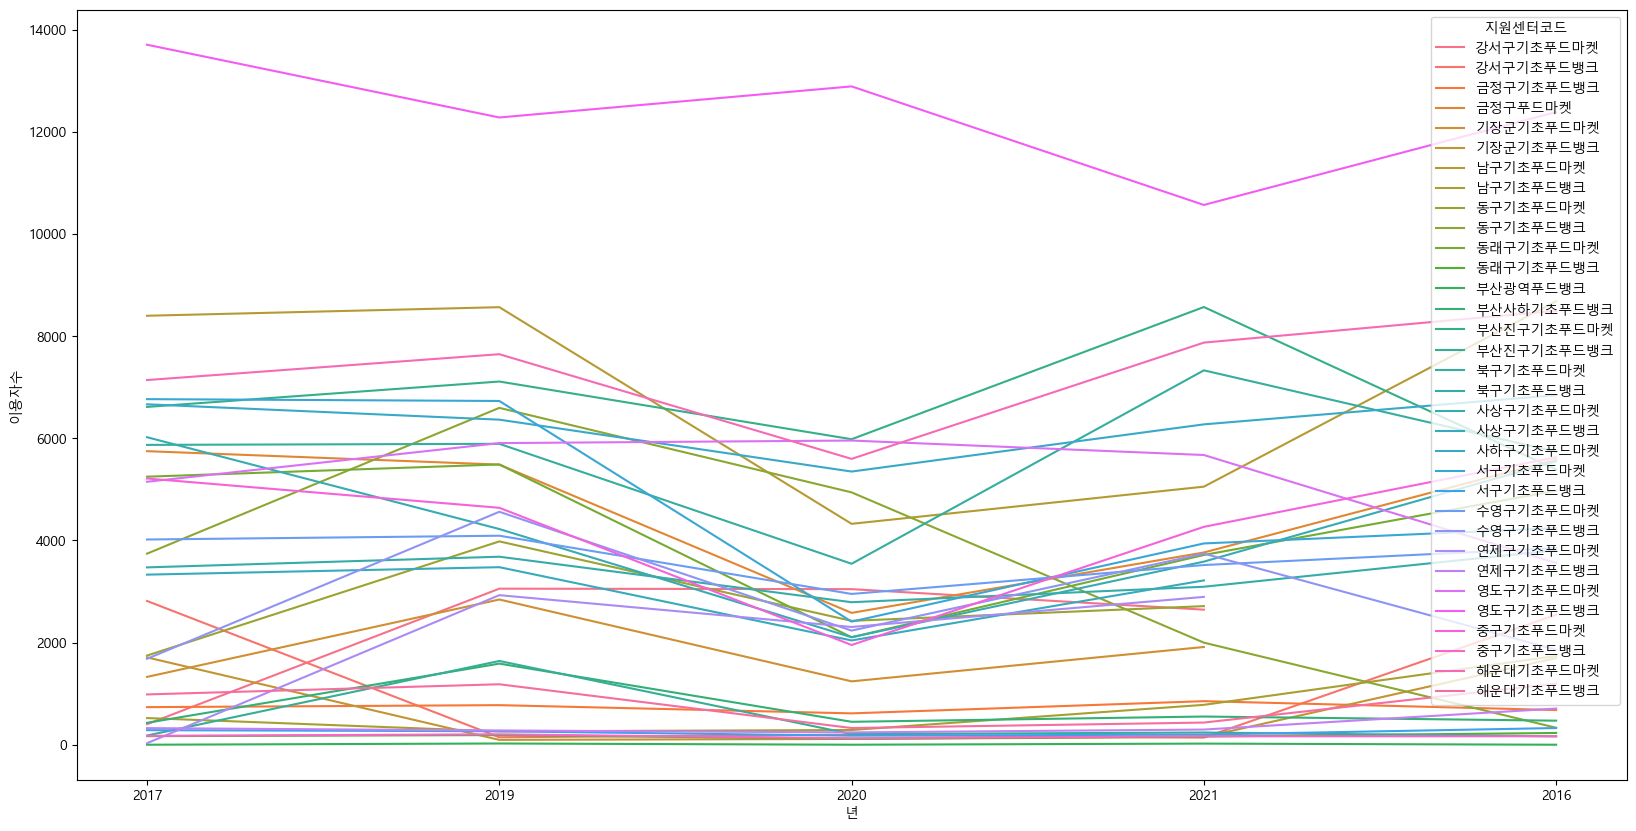

In [112]:
plt.figure(figsize = (20,10))
sns.lineplot(x = data7_1['년'], y = data7_1['이용자수'], hue = data7_1['지원센터코드'])
plt.order

In [ ]:
data7 = data7[data7['신고구분코드'] == '임의신고']

* 당연 - 전담 1명, 보조 2명
* 임의 - 겸직 : 당연 사업장으로 바꿀 때 무인을 만들자(푸드뱅크 / 푸드마켓 통합)

In [ ]:
data7.nunique()

* 4개가 당연 뱅크

* 당연뱅크 - 기부금 3억원 이상 : 기부가 활발한 사업장
    * 당연마켓 + 당연뱅크 규모가 커서 불가능할 수 있다.
    * 당연마켓에 무인 + 전담인력 / 보조인력에 대한 인원 추가적으로 도움 방안

* 당연사업장
    * 뱅크 4곳 - 연제구, 북구, 해운대구, 사하구
    * 마켓 4곳 - 해운대구, 남구, 진구, 사상구

* 당연 마켓 / 뱅크 - 적절히 통합시키자

* 전체 16개 - 당연 3곳 마켓 3곳 + 중복 1곳

> 푸드 마켓 9개에 대한 입지 분석

In [ ]:
data7.head()

In [ ]:
data7['지원센터코드'].unique()

In [ ]:
def month(a):
    return a.split(' ')[1]

In [ ]:
data7['지역구'] = data7['지원센터주소'].apply(month)

In [ ]:
data7

In [ ]:
data7['지역구'].unique()

* 뱅크 4곳 - 연제구, 북구, 해운대구, 사하구
* 마켓 4곳 - 해운대구, 남구, 진구, 사상구

In [ ]:
data7 = data7[data7['지역구'].isin(['동래구','서구', '중구', '금정구', '영도구', '수영구', '기장군', '동구', '강서구'])]

In [ ]:
data7['지원센터코드'] = data7['지원센터코드'].map({'S40001':'동래등대지기푸드마켓',
'S40301':'푸르미&나누미푸드마켓',
'S49001':'중구다솜나래푸드마켓',
'S51401':'부산금정구푸드마켓', 
'S51501':'부산영도구푸드마켓', 
'S58201':'부산수영구함께하는푸드마켓',
'S63901':'기장푸드마켓', 
'S64001':'동구푸드마켓', 
'S64801':'강서구둥지푸드마켓'})

In [ ]:
data7

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = data7['기준년월'], y = data7['이용자수'], hue = data7['지역구'])

* 많은 지역 우선적으로 무인화를 시키는 것 추구 - 사람들이 많이 온다는 것은 사회복지사의 업무 부담이 크다는 것

In [ ]:
data8 = data8[data8['지역코드'] == '부산']
data8.head()

In [ ]:
data8['지원센터코드'] = data8['지원센터코드'].map({'S40001':'동래등대지기푸드마켓',
'S40301':'푸르미&나누미푸드마켓',
'S49001':'중구다솜나래푸드마켓',
'S51401':'부산금정구푸드마켓', 
'S51501':'부산영도구푸드마켓', 
'S58201':'부산수영구함께하는푸드마켓',
'S63901':'기장푸드마켓', 
'S64001':'동구푸드마켓', 
'S64801':'강서구둥지푸드마켓'})

In [ ]:
data8.isnull().sum()

In [ ]:
data8.dropna(axis = 0, inplace = True)

In [ ]:
data8

In [ ]:
data8['선호물품분류코드'].nunique()

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = data8['선호물품분류코드'],y =  data8['보유수량'], estimator = np.mean)

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(x = data8['선호물품분류코드'],y =  data8['보유수량'], hue = data8['지원센터코드'], estimator = np.mean)

* 치약은 북구가 많다.
* 김(류)은 영도구에 많다.